<a href="https://colab.research.google.com/github/Acccci/FER_test/blob/main/anger.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import numpy as np
import pandas as pd
import os
for dirname,_,filenames in os.walk('kaggle/input'):
  for filename in filenames:
    print(os.path.join(dirname, filename))
from keras.layers.core.dropout import Dropout
from keras.layers.core.dense import Dense
from keras.layers.core.flatten import Flatten
from keras.layers.core.activation import Activation
from keras.layers.pooling import MaxPooling2D
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D,MaxPool2D,AveragePooling2D,Input,BatchNormalization, MaxPooling2D, Activation, Flatten, Dense, Dropout
from keras.models import Sequential
from keras.utils import np_utils
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from keras_preprocessing import image
import scipy
import os
import cv2
data = pd.read_csv("/content/drive/MyDrive/anger.csv")

#x数据集是图片的像素；y数据集是标签
x_data = data["pixels"]
y_data = data["emotion"]
sns.set_theme(style="darkgrid")
oversampler = RandomOverSampler(sampling_strategy="auto")

#数据集预处理
x_data, y_data = oversampler.fit_resample(x_data.values.reshape(-1,1),y_data)
print(x_data.shape, " ", y_data.shape)
y_data.value_counts()
y_data.shape
x_data = pd.Series(x_data.flatten())
x_data = np.array(list(map(str.split, x_data)), np.float32)
x_data /= 255
# x_data[:10]
x_data = x_data.reshape(-1, 48, 48, 1)
print(x_data.shape)
y_data = np.array(y_data)
y_data = y_data.reshape(y_data.shape[0], 1)
print(y_data.shape)
x_train,x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=45)

model = Sequential([ 
  Input((48, 48, 1)),
  Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='valid'),
  BatchNormalization(axis=3),
  Activation('relu'),
  Conv2D(64, (3,3), strides=(1,1), padding='same'),
  BatchNormalization(axis=3),
  Activation('relu'),
  MaxPooling2D((2,2)),
  Conv2D(64, (3, 3), strides=(1,1), padding='valid'),
  BatchNormalization(axis=3),
  Activation('relu'),
  Conv2D(128,(3, 3), strides=(1, 1), padding='same'),
  BatchNormalization(axis=3),
  Activation('relu'),
  MaxPooling2D((2, 2)),
  Conv2D(128, (3, 3), strides=(1, 1), padding='valid'),
  BatchNormalization(axis=3),
  Activation('relu'),
  MaxPooling2D((2,2)),
  Flatten(),
  Dense(200, activation='relu'),
  Dropout(0.6),
  Dense(2,activation='sigmoid')  # 如果是一分类表情识别， 此处为1；
  ])
model.summary()
adam = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
y_train = np_utils.to_categorical(y_train, 2)
y_train.shape
y_test = np_utils.to_categorical(y_test, 2)
y_test.shape
# #模型训练
history = model.fit(x_train,y_train,epochs=30,validation_data=(x_test, y_test))



(61868, 1)   (61868,)
(61868, 48, 48, 1)
(61868, 1)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 46, 46, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 46, 46, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 46, 46, 64)       256       
 hNormalization)                                                 
                                                                 
 act

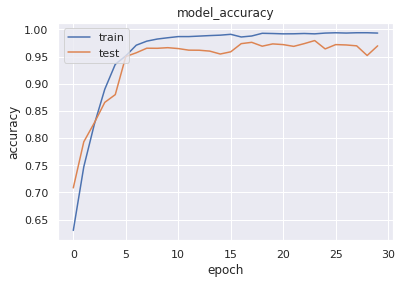

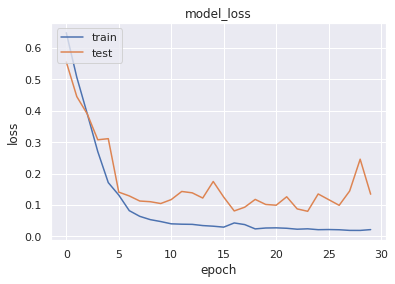

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      3083
           1       0.95      0.99      0.97      3104

    accuracy                           0.97      6187
   macro avg       0.97      0.97      0.97      6187
weighted avg       0.97      0.97      0.97      6187



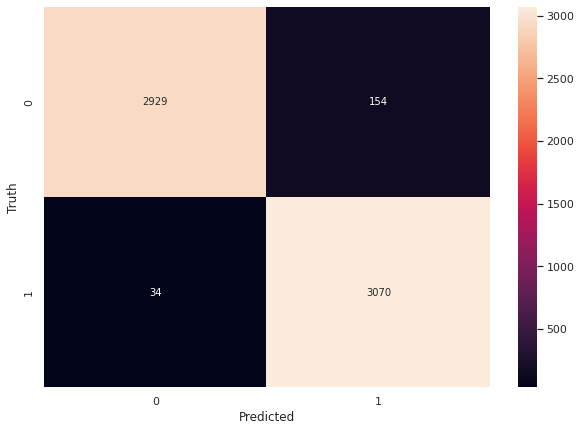

In [2]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()
#summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()
y_pred=model.predict(x_test)
y_result=[]
for pred in y_pred:
  y_result.append(np.argmax(pred))
y_result[:10]

y_actual=[]
for pred in y_test:
  y_actual.append(np.argmax(pred))
y_actual[:10]

from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_actual,y_result))
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_actual,predictions=y_result)


plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
fer_json=model.to_json()
with open("fer_json", "w") as json_file:
  json_file.write(fer_json)

#保存模型
model.save_weights("/content/drive/MyDrive/anger_model.h5")
